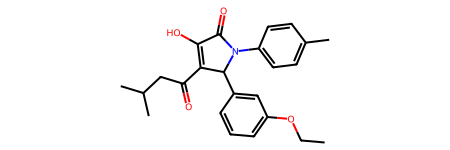

In [61]:
from rdkit import RDConfig
from rdkit.Chem import Draw
from rdkit.Chem.Draw import MolDrawing, DrawingOptions
from rdkit.Chem import FragmentCatalog
from rdkit import Chem
import os

mol = Chem.MolFromSmiles('CCOc1cccc(C2C(C(=O)CC(C)C)=C(O)C(=O)N2c2ccc(C)cc2)c1')

mol

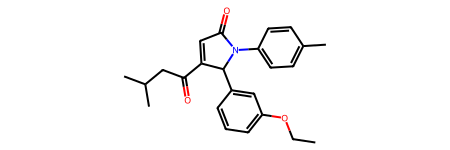

In [62]:
mol = Chem.MolFromSmiles('CCOc1cccc(C2C(C(=O)CC(C)C)=CC(=O)N2c2ccc(C)cc2)c1')
mol

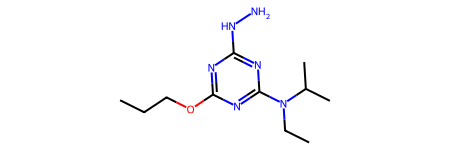

In [38]:
mol = Chem.MolFromSmiles('CCCOc1nc(NN)nc(N(CC)C(C)C)n1')

mol

In [39]:
rwmol = Chem.RWMol(mol)
functional_group = Chem.MolFromSmarts("c1ccccc1")
carbon_atoms = [atom.GetIdx() for atom in mol.GetAtoms() if atom.GetSymbol() == 'C']

In [40]:
atom_to_attach = 0

# 创建一个映射，将官能团中原子的索引映射到新分子中的索引
atom_mapping = {}

# 添加官能团中的原子到新分子中
for atom in functional_group.GetAtoms():
    new_atom_idx = rwmol.AddAtom(atom)
    atom_mapping[atom.GetIdx()] = new_atom_idx

# 添加官能团中的键到新分子中
for bond in functional_group.GetBonds():
    begin_idx = atom_mapping[bond.GetBeginAtomIdx()]
    end_idx = atom_mapping[bond.GetEndAtomIdx()]
    rwmol.AddBond(begin_idx, end_idx, bond.GetBondType())

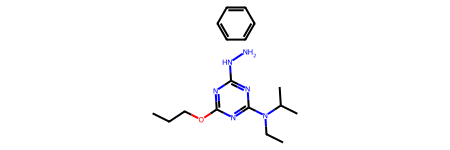

In [41]:
rwmol

In [42]:
rwmol.AddBond(atom_to_attach, new_atom_idx, Chem.BondType.SINGLE)

25

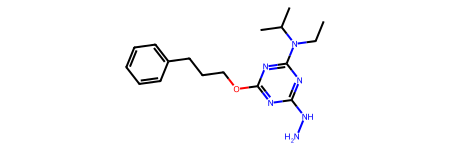

In [43]:
rwmol